#**Using the LightGBM algorithm to predict the default cases**

Dataset Source: https://www.kaggle.com/datasets/nikhil1e9/loan-default

In [1]:
#Importing the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
data = pd.read_csv('/content/Loan_default.csv')

In [3]:
#Reading the first 5 rows of the dataset to get familiar with the type of information with the dataset
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#Printing information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
#Checking if the data has any missing values
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
#Checking the number of unique values in the categorical feature with cardinality more than 2
temp = data[['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']].nunique()
temp

Education         4
EmploymentType    4
MaritalStatus     3
LoanPurpose       5
dtype: int64

In [7]:
#Splitting the dependent (y) and independent (X) features
X = data.drop(['LoanID', 'Default'], axis =1)
y= data['Default']

In [8]:
#Converting the categorical feature into appropriate type for the LightGBM
for i in X.columns:
  column_type = X[i].dtype
  if column_type == 'object' or column_type.name == 'category':
    X[i] = X[i].astype('category')

In [9]:
#Printing information about the independent feature after changing the dtypes of categorical feature from 'object' to 'category'
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Age             255347 non-null  int64   
 1   Income          255347 non-null  int64   
 2   LoanAmount      255347 non-null  int64   
 3   CreditScore     255347 non-null  int64   
 4   MonthsEmployed  255347 non-null  int64   
 5   NumCreditLines  255347 non-null  int64   
 6   InterestRate    255347 non-null  float64 
 7   LoanTerm        255347 non-null  int64   
 8   DTIRatio        255347 non-null  float64 
 9   Education       255347 non-null  category
 10  EmploymentType  255347 non-null  category
 11  MaritalStatus   255347 non-null  category
 12  HasMortgage     255347 non-null  category
 13  HasDependents   255347 non-null  category
 14  LoanPurpose     255347 non-null  category
 15  HasCoSigner     255347 non-null  category
dtypes: category(7), float64(2), int64(7)
m

In [10]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [11]:
#Importing the LightGBM algorithm
import lightgbm as lgbm
classifier = lgbm.LGBMClassifier(num_leaves=15, max_depth=-1, random_state=1, silent=True, metric='None',
                                 n_jobs=4, n_estimators=1000, colsample_bytree=0.9, subsample=0.9, learning_rate=0.1)

In [12]:
#Training the model
classifier.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 23741, number of negative: 180536
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1314
[LightGBM] [Info] Number of data points in the train set: 204277, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116220 -> initscore=-2.028727
[LightGBM] [Info] Start training from score -2.028727


LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=1, silent=True, subsample=0.9)

<Axes: >

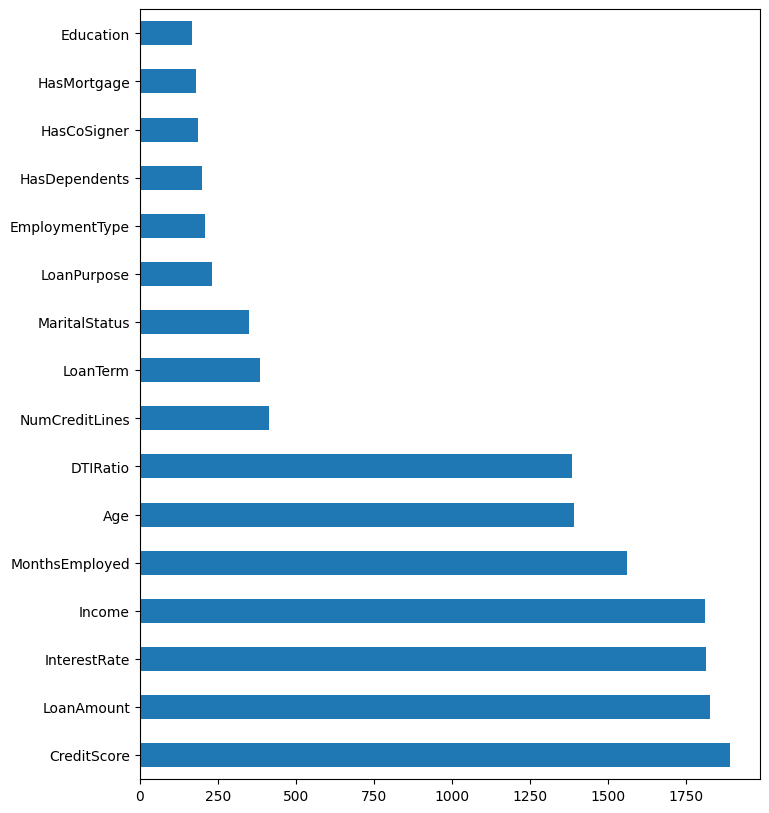

In [13]:
#Plotting the feature importance graph according to out LightGBM model
feat_imp = pd.Series(classifier.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))

##Observation
As we can see that our LightGBM algorthm thinks of **Credit Score** as the most important feature in predicting the default case followed by Loan Amount and Interest rate of the loan whereas **Education** is the least important feature when it comes to replayment of the loan.

In [14]:
#Predicting the defaulters based on our test data
y_pred = classifier.predict(X_test)

[LightGBM] [Warning] Unknown parameter: silent


In [15]:
#Checking the accuracy of our trained model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)

print('Accuracy using LightGBM algorithm: ',accuracy)

Accuracy using LightGBM algorithm:  0.8871157235167417


#**Comparing the accuracy of LighGBM with other classification algorithms**

In [16]:
#Making a copy of the original dataset
dataset = data.copy()
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [17]:
#Using label encoder to convert the categorical features into numerical form
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
category_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']

for i in category_col:
  dataset[i] = encoder.fit_transform(dataset[i])

dataset = dataset.drop(['LoanID'], axis=1)

In [18]:
#Checking the data type of features after the label encoder operartion
dataset.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object

In [19]:
#Now that all the categorical columns are converted into numerical columns, lets check there correlation with the target feature
featurecorr = dataset.corr()['Default'].sort_values()
featurecorr

Age              -0.167783
Income           -0.099119
MonthsEmployed   -0.097374
HasCoSigner      -0.039109
HasDependents    -0.034678
CreditScore      -0.034166
HasMortgage      -0.022856
Education        -0.022835
LoanPurpose      -0.010096
MaritalStatus    -0.007902
LoanTerm          0.000545
DTIRatio          0.019236
NumCreditLines    0.028330
EmploymentType    0.041010
LoanAmount        0.086659
InterestRate      0.131273
Default           1.000000
Name: Default, dtype: float64

###Observation
As we can see interest rate has a high positive correlation to the Default cases which was not the case in the lightGBM model. For lightGBM model Credit Score was the most important feature

In [20]:
#Lets try to implement the result above in a more visually appealing form
import plotly.express as px
fig = px.imshow(dataset.corr(), text_auto=True)
fig.update_layout(
    autosize=False,
    width=1100,
    height=1100,)
fig.show()

##Insights from the heatmap
As we can see in the heat map, Age is negatively correlated to the default cases, which is still important as it tells us about the patterns related to this two features, for example younger the person, higher is the chance of them defaulting a loan. Where as Interest rate is postively correlated to the Default cases which tells is that, higher the interest rate of a loan, higher is the chance for a person to default that loan. Lets see it in a more visually appealing form below.

<Axes: xlabel='Age', ylabel='Default'>

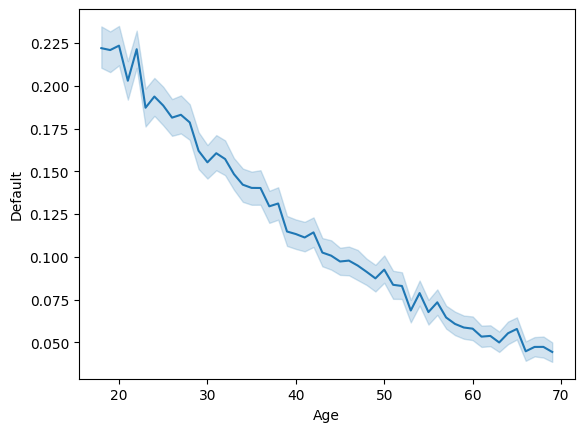

In [41]:
sns.lineplot(data= dataset, x = 'Age', y= 'Default')

<Axes: xlabel='InterestRate', ylabel='Default'>

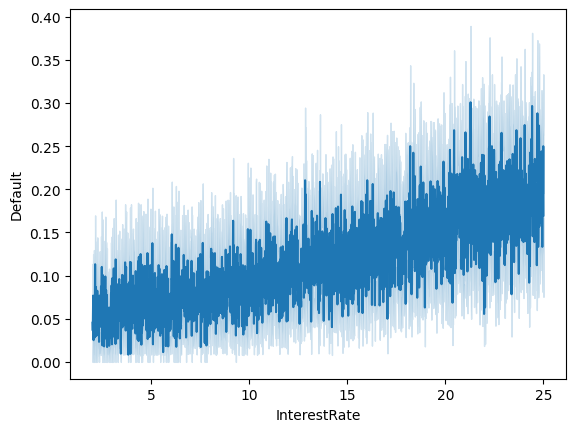

In [39]:
sns.lineplot(data= dataset, x = 'InterestRate', y= 'Default')

In [21]:
#Splitting the data into dependent and independent features
X1 = dataset.drop(['Default'], axis=1)
y1 = dataset['Default']

#Splitting the data into train and test dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [22]:
#Importing multiple classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = [
  XGBClassifier(),
  RandomForestClassifier(),
  LogisticRegression(),
  KNeighborsClassifier(),
]

for mod in models:
  mod.fit(X1_train, y1_train)
  y_pred1 = mod.predict(X1_test)
  score = accuracy_score(y_pred1, y1_test)
  model_name = mod.__class__.__name__
  print(f'{model_name} -> Accuracy: {score: .2f}')


XGBClassifier -> Accuracy:  0.89
RandomForestClassifier -> Accuracy:  0.89
LogisticRegression -> Accuracy:  0.88
KNeighborsClassifier -> Accuracy:  0.87


##Observation
As we can see, XGBoost and RandomForest algorithms worked even better than LightGBM algorithm, followed by Logistic Regression which performed same as the LightGBM whereas KNeighbors performed the worst out of all these algorithms.

Even though we had to do some data preprocessing with the categorical features to get a good accuracy with XGBoot and RandomForest, LightGBM performed almost as good without even manipulating the categorical features.

This begs the question that, when the dataset is not clean at all (since I was lucky enough to get a clean dataset this time) and there are lots of categorical features, should be try to encode them and create lots of additional fetaures at the risk of overfitting OR should we let LightGBM algorithm to handle that on its own with just necessary data preprocessing steps.